# Regularization

Neural networks commonly use regularization. 
General goal to set the weight (or bias, not encouraged/has no effect) parameters close to 0 for certain features you'd like to eliminate.

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import Output
from plt_overfit import overfit_example, output
# plt.style.use('./deeplearning.mplstyle')

Output()

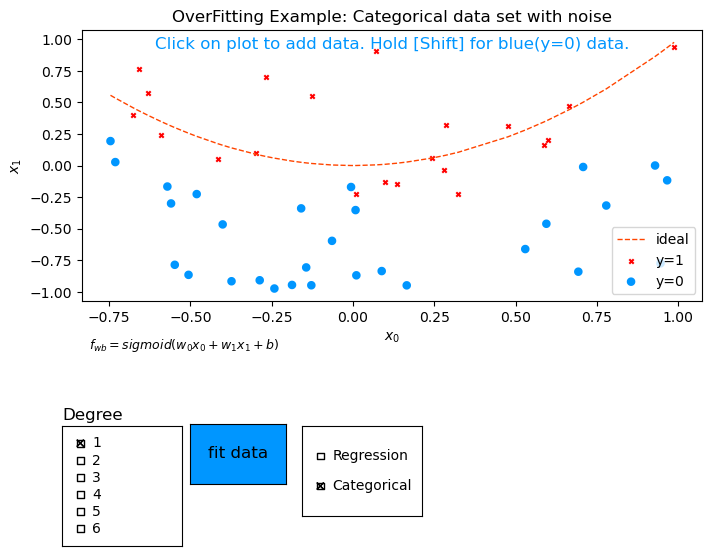

In [12]:
plt.close("all")
display(output)
ofit = overfit_example(False)

## Methods

Since you may not know which features are causing the model to poorly fit the data, regularization automaters this by penalizing all the weight parameters. This is done through adding a known large constant, factored into the Cost function:

$J(\vec{w}, b) = \frac{1}{2m}\sum_{i=1}^m((f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)}))^2 + \frac{\lambda}{2m}\sum_{j=1}^nw^2_j$ where the regularization parameter $\lambda > 0$

- lambda determines the strength at which you scale down the weight parameters (higher $\lambda$ -> lower $w$)
- scales lambda the same way (2m) as the other summation
- by convention, it doesn't penalize $b$
- since the goal is to minimize the cost function, the algorithm will now also focus on minimizing the weight parameters


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)

## Regulirization for Linear Regression

New PDs (recall deriv of a summation that not wrt to the PD disappears):

$\frac{\delta J(\vec{w_{n}}, b_{n})}{\delta w_{n}} = \frac{1}{m}\sum_{i=1}^m(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x^{(i)}_j + \frac{\lambda}{m}w_j$ 

$\frac{\delta J(\vec{w_{n}}, b_{n})}{\delta w_{n}} = \frac{1}{m}\sum_{i=1}^m(f_{w,b}(x^{(i)}) - y^{(i)})$

Everything else functions the same.

### Background

Rearranging the $w_{j+1}$

$w_{j+1} = w_j - \alpha\frac{\lambda}{m}w_j - \alpha\frac{\lambda}{m}\sum_{i=1}^m(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x^{(i)}_j$

$w_{j+1} = w_j(1 - \alpha\frac{\lambda}{m}) - \text{[usual update for lin reg]}$

Which has the effect of:

$w_j(1 - 0.01\frac{1}{50}) = w_j * 0.9998$

slightly shrinking ever weight parameter on every iteration of GD.


In [14]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [15]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


## Regulirization for Logistic Regression

Same edit to the cost function:

$J(\vec{w}, b) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(f_{\vec{w},b}(\vec{x}^{(i)}) + (1 - y^{(i)})log(1 - f_{\vec{w},b}(\vec{x}^{(i)})] + \frac{\lambda}{2m}\sum_{j=1}^nw^2_j$

New PDs are exactly the same- just know the prediction function is logistic here and not a regression polynomial:

$\frac{\delta J(\vec{w_{n}}, b_{n})}{\delta w_{n}} = \frac{1}{m}\sum_{i=1}^m(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x^{(i)}_j + \frac{\lambda}{m}w_j$ this is now a vector because of the $w_j$ term.

$\frac{\delta J(\vec{w_{n}}, b_{n})}{\delta w_{n}} = \frac{1}{m}\sum_{i=1}^m(f_{w,b}(x^{(i)}) - y^{(i)})$

In [16]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [17]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


Output()

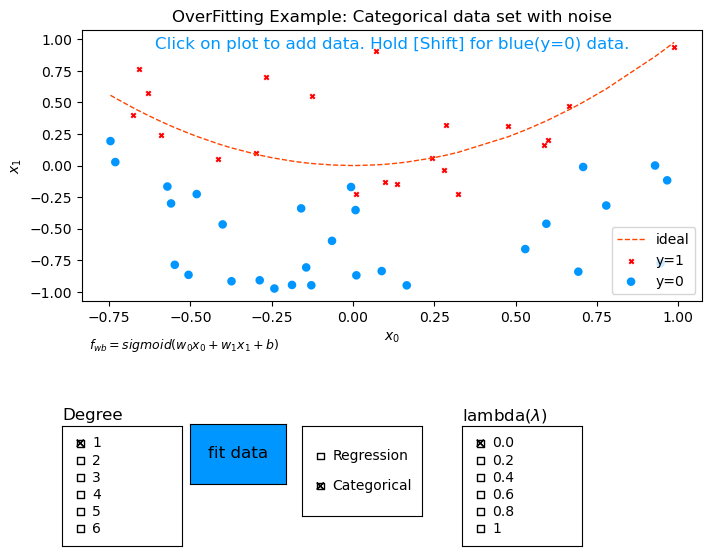

In [18]:
plt.close("all")
display(output)
ofit = overfit_example(True)